# Regressão Linear - Bolsa De Valores Americana

### fonte de dados: https://finance.yahoo.com/
### https://finance.yahoo.com/screener/predefined/most_actives

### Nome: Aluno..., Matricula:....

In [1]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls 

 AAPL.csv
 data
 fabebook-linregr.pdf
 FB2018.csv
 FB.csv
 images
'LinearRegression-Bolsa De Valores-Com-Split-Dados-V01.ipynb'
'LinearRegression-Bolsa De Valores-Com-Split-Dados-Versao-02.ipynb'
 README.md
 regressao-01.jpg
 SP500.csv


## Leitura dos dados

In [8]:
# açoes da Facebook
fb = pd.read_csv("FB2018.csv").set_index("Date")
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [4]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,157.809998,159.199997,154.110001,155.389999,155.389999,36796000
2018-04-03,156.550003,157.389999,150.809998,156.110001,156.110001,42034000
2018-04-04,152.029999,155.559998,150.509995,155.100006,155.100006,49885600
2018-04-05,161.559998,161.570007,156.649994,159.339996,159.339996,41449600
2018-04-06,157.729996,161.419998,156.809998,157.199997,157.199997,41323600


In [5]:
print("Numero de Registros ou Tuplas: ", len(fb))

Numero de Registros ou Tuplas:  1480


In [6]:
1480/330

4.484848484848484

In [9]:
# converte o index para o tipo data
fb.index = pd.to_datetime(fb.index)
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [10]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2012-05-18 to 2018-04-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1480 non-null   float64
 1   High       1480 non-null   float64
 2   Low        1480 non-null   float64
 3   Close      1480 non-null   float64
 4   Adj Close  1480 non-null   float64
 5   Volume     1480 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.9 KB


In [11]:
fb.describe()['Close']

count    1480.000000
mean       89.860723
std        48.678628
min        17.730000
25%        49.395002
50%        81.410000
75%       124.352499
max       193.089996
Name: Close, dtype: float64

In [12]:
l = [x.toordinal() for x in fb.index]
l[:5]

[734641, 734644, 734645, 734646, 734647]

In [13]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


## Preparacao do modelo

In [14]:
olm = lm.LinearRegression()
X = numpy.array([x.toordinal() for x in fb.index])[:, numpy.newaxis]
y = fb['Close']
print(X[:5])

[[734641]
 [734644]
 [734645]
 [734646]
 [734647]]


In [15]:
print(y[:5])

Date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
Name: Close, dtype: float64


## Aplicar o modelo de Regressao

In [16]:
#aplicacao do modelo de regressao
olm.fit(X, y) # Exemplos de Hiperparametros: epochs=100, learning_rate = 0.001, momentum=0.08, optimizer="SGD")

LinearRegression()

## Métrica para avaliar o modelo
R² - coeficiente de determinação. 
Essa métrica fornece uma indicação do nível de precisão das previsões em relação aos valores observados. <br>
Também chamado de coeficiente de determinação. <br>
Valores entre 0 e 1, sendo 1 o valor ideal.

In [18]:
from sklearn.metrics import r2_score
import numpy as np
# aplicando a predicao - datas
#y_pred = [olm.predict(x.toordinal())[0] for x in fb.index]

y_pred =  [olm.predict( np.array( x.toordinal() ).reshape(-1, 1)  )[0] for x in fb.index]

# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.9664639352112534


## Plota o modelo

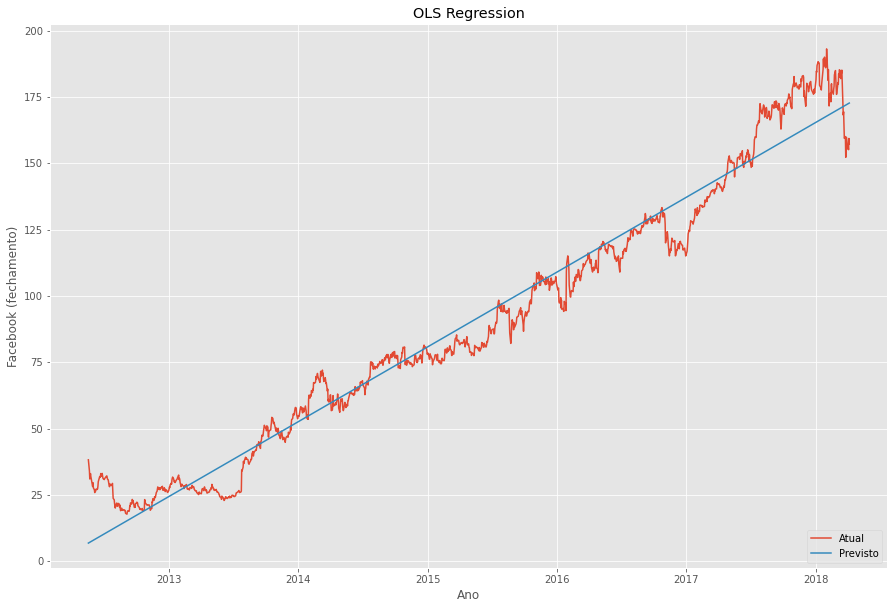

In [19]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, y_pred)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.show()

## previsao para os anos de 2019, 2020, ...

In [20]:
from datetime import datetime

data = "2019-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')
yp2019 = olm.predict(np.array(datetime_object.toordinal()).reshape(1,-1))
print ("previsao para ", data, " (fechamento) = us$ ", yp2019[0])

previsao para  2019-01-30  (fechamento) = us$  195.76337093909387


In [21]:
data = "2020-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')
yp2020 = olm.predict(np.array(datetime_object.toordinal()).reshape(1,-1))
print ("previsao para ", data, " (fechamento) = us$ ", yp2020[0])

previsao para  2020-01-30  (fechamento) = us$  223.93264399632608


In [22]:
data = "2025-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')
yp2025 = olm.predict(np.array(datetime_object.toordinal()).reshape(1,-1))
print ("previsao para ", data, " (fechamento) = us$ ", yp2025[0])

previsao para  2025-01-30  (fechamento) = us$  364.933361463598


In [23]:
lucro = yp2025[0] / yp2019[0] * 100
print("diferenca ano 2025 - 2019 - Lucro da ação do Facebook (%) ->", "{:3.0f}%".format(lucro)  )

diferenca ano 2025 - 2019 - Lucro da ação do Facebook (%) -> 186%


# Exercício: Pegar 1 ativo (ação) da Bolsa de Valores (NY ou Bovespa) e executar o jupyter

https://finance.yahoo.com/screener/predefined/most_actives OU

https://www.infomoney.com.br/cotacoes/ibovespa/

# Regressão Linear - Usando conjuntos de treino/teste 

## Split aleatório de treino e teste

In [ ]:
from IPython.display import Image
Image(url = 'data/split-de-dados-machine-learning.png')

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).
Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [ ]:
from sklearn import model_selection
# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

Y = y
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

In [ ]:
X_treino.shape, X_teste.shape

In [ ]:
X_treino[:3]

In [ ]:
# Criação do modelo
modelo = lm.LinearRegression()
modelo.fit(X_treino, Y_treino)
olm = modelo

# aplicando a predicao - datas
from sklearn.metrics import r2_score
y_pred = [olm.predict(np.array(x).reshape(1,-1)) for x in X_teste.ravel()]  
# Evaluate the model
r2 = r2_score(Y_teste, y_pred)
print('r2 = ', r2 )

## Plota o modelo

In [ ]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

y_pred = [olm.predict(np.array(x).reshape(1,-1)) for x in X.ravel()]

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, y_pred)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")

plt.show()

# Usando Validação Cruzada para Avaliar o modelo

In [ ]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão. <br />
O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. <br /> A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [ ]:
# Definindo os valores para os folds
num_folds = 10 # mudar o número de modelos
num_instances = len(X) # Numero de linhas ou Numero de Registros ou Numero de Tuplas
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

Y = Y
# Criando o modelo
modelo = lm.LinearRegression()
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)
# Usamos a média e o desvio padrão
print("Acurácia: %.3f%% (%.3f%%)" % (resultado.mean()*100.0, resultado.std() * 100.0))

Acurácia: 96.596% (0.294%)

In [ ]:
resultado

In [ ]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, y_pred)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.show()

In [ ]:
from datetime import datetime

data = "2022-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')


yp2019 = olm.predict(np.array(datetime_object.toordinal()).reshape(-1,1))
print ("previsao para ", data, " (fechamento) = us$ ", yp2019[0])

### Exercício: Executar com um número de num_folds diferente de 10 - mudar o número de modelos